### Setup ###
#### Import Libraries ####

In [8]:
%pylab inline
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


#### Read Data ####

In [9]:
train_data = pd.read_csv('data/train.csv',parse_dates=[0])
test_data = pd.read_csv('data/test.csv',parse_dates=[0])
# Show a few rows so we know what we're working with
train_data[100:105]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
100,2011-01-05 09:00:00,1,0,1,1,9.02,9.850,37,22.0028,6,109,115
101,2011-01-05 10:00:00,1,0,1,1,9.02,9.850,37,22.0028,4,53,57
102,2011-01-05 11:00:00,1,0,1,1,10.66,11.365,33,22.0028,12,34,46
103,2011-01-05 12:00:00,1,0,1,1,10.66,11.365,33,22.0028,5,74,79
104,2011-01-05 13:00:00,1,0,1,1,11.48,12.880,30,19.9995,6,65,71


### Validate Data ###
#### Basic bounds checks on data ####

In [10]:
def err(msg, i):
    print("Error in Row {}: {}".format(i, msg));

for i, row in train_data.iterrows():
    time, season, holiday, workingday = row['datetime'], row['season'], row['holiday'], row['workingday']
    weather, temp, atemp, humidity, windspeed = row['weather'], row['temp'], row['atemp'], row['humidity'], row['windspeed']
    casual, reg, cnt = row['casual'], row['registered'], row['count']
    
    if time > datetime.datetime.now():
        err('timestamp from the future', i)
    if season not in [1,2,3,4]:
        err('invalid season', i)
    if holiday not in [False, True]:
        err('invalid holiday', i)
    if workingday not in [False, True]:
        err('invalid workingday', i)
    if holiday and workingday:
        err("can't be holiday and workingday", i)
    if weather not in [1,2,3,4]:
        err('invalid weather conditions', i)
    if temp < -35 or temp > 50: # record temps -26, 41
        err('invalid temperature', i)
    if atemp < -50 or atemp > 60:
        err('invalid feels like temp (atemp)', i)
    if humidity < 0 or humidity > 100:
        err('invalid humidity', i)
    if windspeed < 0 or windspeed > 80:
        err('invalid windspeed', i)
    if casual < 0 or reg < 0 or cnt < 0:
        err('Negative customers', i)
    if casual + reg != cnt:
        err('count != casual + registered', i)
        
print("Error Check Complete")

Error Check Complete


#### Histograms of Data ####
##### Setup plotting #####

In [11]:
plt.style.use('ggplot')

##### Plot all fields (except datetime for now) #####

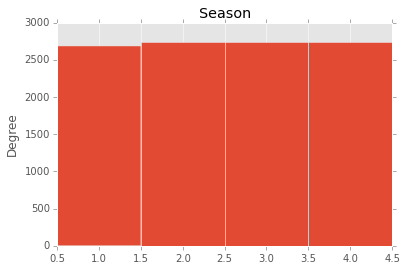

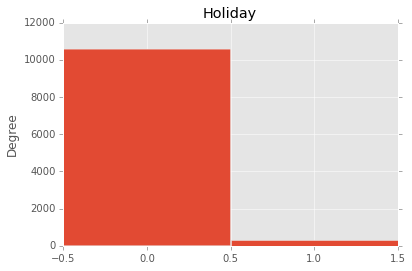

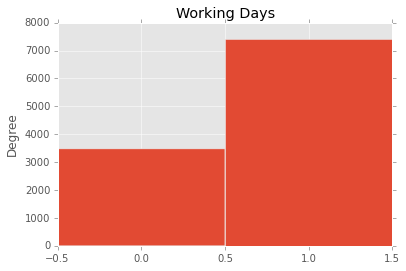

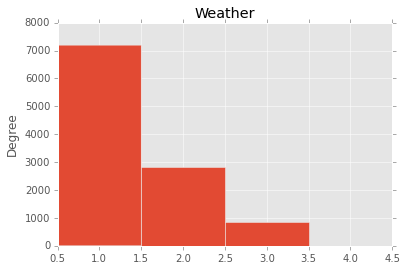

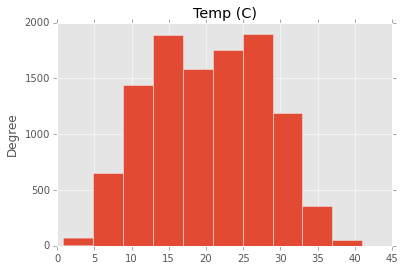

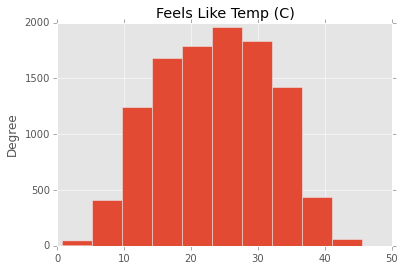

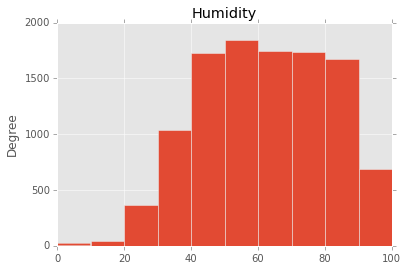

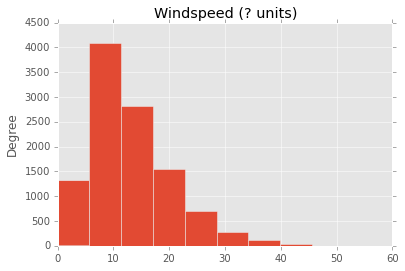

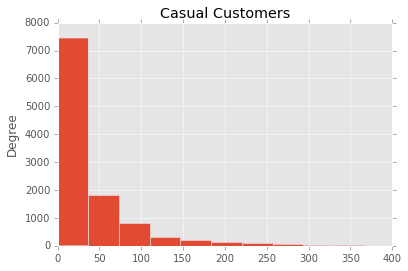

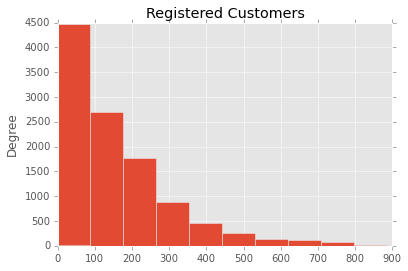

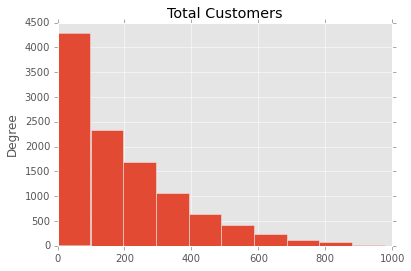

In [12]:
four_bins = [0.5,1.5,2.5,3.5,4.5]
two_bins = [-0.5,0.5,1.5]
plt.figure()
train_data['season'].plot(kind='hist', bins=four_bins, title='Season')
plt.figure()
train_data['holiday'].plot(kind='hist', bins=two_bins, title="Holiday")
plt.figure()
train_data['workingday'].plot(kind='hist', bins=two_bins, title="Working Days")
plt.figure()
train_data['weather'].plot(kind='hist', bins=four_bins, title='Weather')
plt.figure()
train_data['temp'].plot(kind='hist', title='Temp (C)')
plt.figure()
train_data['atemp'].plot(kind='hist', title='Feels Like Temp (C)')
plt.figure()
train_data['humidity'].plot(kind='hist', title='Humidity')
plt.figure()
train_data['windspeed'].plot(kind='hist', title='Windspeed (? units)')
plt.figure()
train_data['casual'].plot(kind='hist', title='Casual Customers')
plt.figure()
train_data['registered'].plot(kind='hist', title='Registered Customers')
plt.figure()
train_data['count'].plot(kind='hist', title='Total Customers')

plt.show()

##### Some random checks after looking at histograms #####
The data that's following doesn't quite make sense:
* Shouldn't we have temperatures below 0C?
* Why only one hour ever with severe weather?

In [13]:
print('Min Temp: {}'.format(min(train_data['temp'])))
print('Max Temp: {}'.format(max(train_data['temp'])))
print('Min aTemp: {}'.format(min(train_data['atemp'])))
print('Max aTemp: {}'.format(max(train_data['atemp'])))
print('Num Days with Weather of 4: {}'.format(len(train_data[train_data['weather'] == 4])))

Min Temp: 0.82
Max Temp: 41.0
Min aTemp: 0.76
Max aTemp: 45.455
Num Days with Weather of 4: 1


#### Summary ####
Data is relative clean, although there are a few strange things to note.
There are no temperatures below 0 degrees C which is impossible for two years of data in DC.
Only one data point (one hour) in two entire years has a weather rating of 4.
4 indicates severe weather, and surely DC has severe weather more than once every two years.